<a href="https://colab.research.google.com/github/Vaibhav-sa30/Natural-Language-Processing-using-only-Sklearn-Library/blob/main/MLP_New_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#This is how submission csv should look like

In [ ]:
sample = pd.read_csv('/content/sample.csv')

In [ ]:
sample.head()

,id,sentiment
0,0,NEGATIVE
1,1,NEGATIVE
2,2,NEGATIVE
3,3,NEGATIVE
4,4,NEGATIVE


#Load and Learn more about train, movie, and test dataset

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
movies = pd.read_csv('/content/movies.csv')

##Explore Train

In [ ]:
train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [ ]:
train.shape

(162758, 5)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


In [ ]:
train.isna().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

In [ ]:
train.describe()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
count,162758,162758,162758,156311,162758
unique,16812,4482,2,155071,2
top,escape_the_terminator_tyler_durden_astonish,Sherri Morrison,False,Parental Content Review,POSITIVE
freq,708,962,113189,29,108761


In [ ]:
train = train.drop_duplicates(subset='movieid')
train.shape

(16812, 5)

In [ ]:
train = train.fillna('?')

In [ ]:
train.isna().sum()

movieid               0
reviewerName          0
isFrequentReviewer    0
reviewText            0
sentiment             0
dtype: int64

##Explore Movies

In [ ]:
movies.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


In [ ]:
movies.shape

(143258, 14)

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               143258 non-null  object 
 1   title                 143258 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   rating                13991 non-null   object 
 4   ratingContents        13991 non-null   object 
 5   releaseDateTheaters   30773 non-null   object 
 6   releaseDateStreaming  79420 non-null   object 
 7   runtimeMinutes        129431 non-null  float64
 8   genre                 132175 non-null  object 
 9   originalLanguage      129400 non-null  object 
 10  director              143258 non-null  object 
 11  boxOffice             14743 non-null   object 
 12  distributor           23005 non-null   object 
 13  soundType             15917 non-null   object 
dtypes: float64(2), object(12)
memory usage: 15.3+ MB


In [ ]:
movies.describe(include = 'object')

,movieid,title,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,genre,originalLanguage,director,boxOffice,distributor,soundType
count,143258,143258,13991,13991,30773,79420,132175,129400,143258,14743,23005,15917
unique,126404,126404,10,8353,12062,4726,2912,112,62208,4863,3694,551
top,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,R,['Language'],2018-09-14,2017-05-22,Drama,English,Joseph Brooks,$1.1M,Paramount Pictures,Surround
freq,367,367,7734,365,37,1232,27860,85034,4194,118,994,4075


In [ ]:
movies = movies.drop_duplicates(subset='movieid')
movies.shape

(126404, 14)

In [ ]:
movies.isna().sum()

movieid                      0
title                        0
audienceScore            62690
rating                  114626
ratingContents          114626
releaseDateTheaters     100014
releaseDateStreaming     57131
runtimeMinutes           12494
genre                    10003
originalLanguage         12384
director                     0
boxOffice               113876
distributor             106855
soundType               112938
dtype: int64

##Merge Train and Movies

In [ ]:
merged_df = pd.merge(train, movies, on='movieid', how='left')
merged_df.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."


In [ ]:
merged_df.shape

(16812, 18)

In [ ]:
merged_df.isna().sum()

movieid                     0
reviewerName                0
isFrequentReviewer          0
reviewText                  0
sentiment                   0
title                       0
audienceScore            1831
rating                  10676
ratingContents          10676
releaseDateTheaters      5891
releaseDateStreaming     2295
runtimeMinutes            478
genre                     324
originalLanguage          451
director                    0
boxOffice                8453
distributor              6816
soundType               11038
dtype: int64

In [ ]:
#merged_df = merged_df.fillna('?')

from sklearn.impute import SimpleImputer

# Assuming merged_df contains your DataFrame with both categorical and numerical columns
categorical_columns = merged_df.select_dtypes(include=['object']).columns

# Create a SimpleImputer instance for most frequent imputation
imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to all categorical columns
merged_df[categorical_columns] = imputer.fit_transform(merged_df[categorical_columns])



In [ ]:
merged_df.isna().sum()

movieid                    0
reviewerName               0
isFrequentReviewer         0
reviewText                 0
sentiment                  0
title                      0
audienceScore           1831
rating                     0
ratingContents             0
releaseDateTheaters        0
releaseDateStreaming       0
runtimeMinutes           478
genre                      0
originalLanguage           0
director                   0
boxOffice                  0
distributor                0
soundType                  0
dtype: int64

In [ ]:
# Assuming merged_df contains your DataFrame with both numerical and categorical columns
numerical_columns = merged_df.select_dtypes(include=['number']).columns

# Create a SimpleImputer instance for mean imputation
imputer = SimpleImputer(strategy='mean')

# Apply imputation to all numerical columns
merged_df[numerical_columns] = imputer.fit_transform(merged_df[numerical_columns])


In [ ]:
merged_df.isna().sum()

movieid                 0
reviewerName            0
isFrequentReviewer      0
reviewText              0
sentiment               0
title                   0
audienceScore           0
rating                  0
ratingContents          0
releaseDateTheaters     0
releaseDateStreaming    0
runtimeMinutes          0
genre                   0
originalLanguage        0
director                0
boxOffice               0
distributor             0
soundType               0
dtype: int64

In [ ]:
merged_df.describe()

,audienceScore,runtimeMinutes
count,16812.000000,16812.000000
mean,63.180028,101.930268
std,19.475450,21.156548
min,0.000000,4.000000
25%,50.000000,90.000000
50%,63.180028,100.000000
75%,78.000000,110.000000
max,100.000000,561.000000


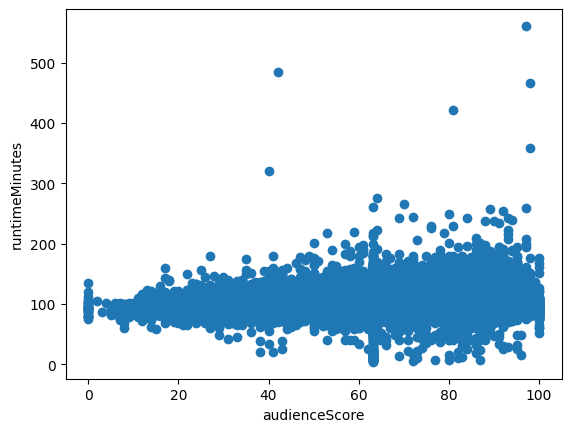

In [ ]:
plt.scatter(merged_df['audienceScore'], merged_df['runtimeMinutes'])
plt.xlabel('audienceScore')
plt.ylabel('runtimeMinutes')
plt.show()


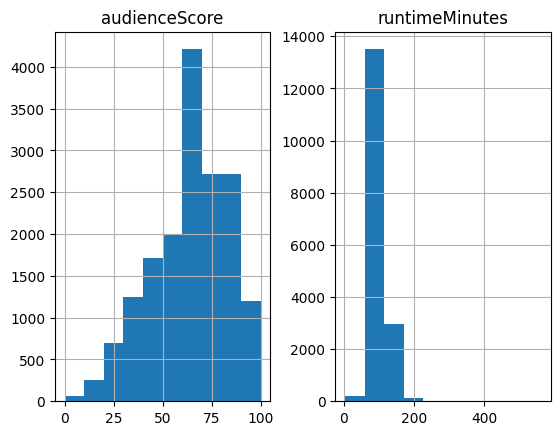

In [ ]:
merged_df[['audienceScore', 'runtimeMinutes']].hist()
plt.show()


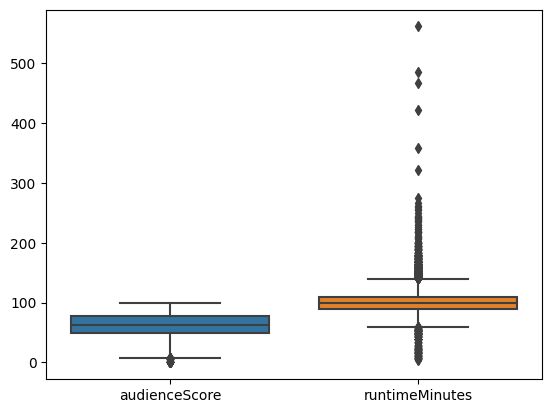

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for numerical columns
sns.boxplot(data=merged_df[['audienceScore', 'runtimeMinutes']])
plt.show()


Notice, minimum and maximum of audience score and runtime aren't on the same scale. So we use standard scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

merged_df[numerical_columns] = scaler.fit_transform(merged_df[numerical_columns])

In [ ]:
merged_df.describe()

,audienceScore,runtimeMinutes
count,1.681200e+04,1.681200e+04
mean,-3.169802e-16,2.003315e-16
std,1.000030e+00,1.000030e+00
min,-3.244182e+00,-4.628977e+00
25%,-6.767710e-01,-5.639211e-01
50%,-3.648511e-16,-9.124010e-02
75%,7.609792e-01,3.814409e-01
max,1.890640e+00,2.169935e+01


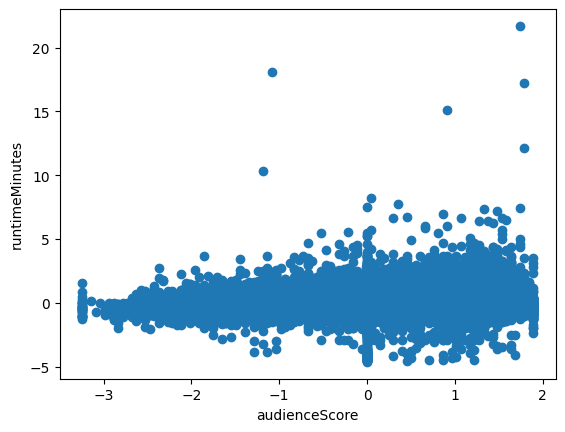

In [ ]:
plt.scatter(merged_df['audienceScore'], merged_df['runtimeMinutes'])
plt.xlabel('audienceScore')
plt.ylabel('runtimeMinutes')
plt.show()


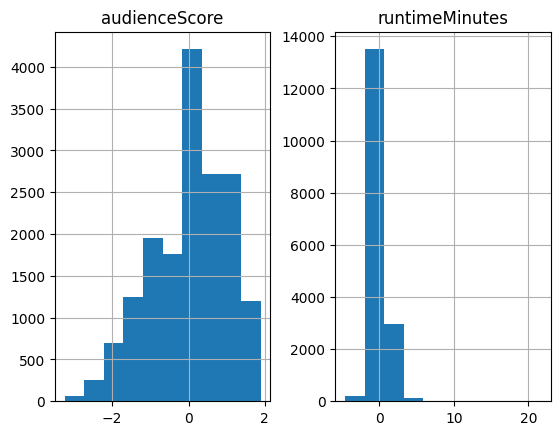

In [ ]:
merged_df[['audienceScore', 'runtimeMinutes']].hist()
plt.show()


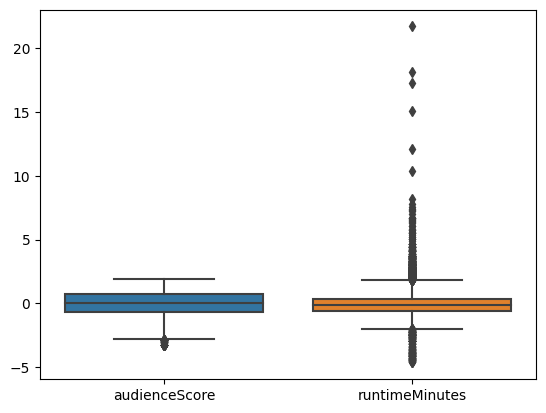

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for numerical columns
sns.boxplot(data=merged_df[['audienceScore', 'runtimeMinutes']])
plt.show()


In [ ]:
merged_df.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,9.345232e-02,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,0.145100,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,$1.1M,Netflix,Surround
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,-3.648511e-16,R,['Language'],2018-09-14,2013-01-08,-0.516653,Action,English,Alma White,$1.1M,Paramount Pictures,Surround
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,8.636756e-01,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,1.326803,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",Surround
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,-3.648511e-16,R,['Language'],2018-09-14,2020-06-02,-4.109028,Drama,Spanish,Eric Hutcherson,$1.1M,Paramount Pictures,Surround
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,1.736595e+00,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,1.374071,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."


####Take 6 top/important features from movie and all features from train..
####Then train logreg with tuned hyperparameters using gridsearchCV.

In [ ]:
import scipy.stats as stats

# Assuming you have a movies DataFrame with 'genre' and 'rating' columns
contingency_table = pd.crosstab(movies['genre'], movies['rating'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)

Chi-square statistic: 23968.706332095488
P-value: 0.0
Degrees of freedom: 9108


In [ ]:
'''
# Example using scikit-learn's SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df['categorical_column'] = imputer.fit_transform(df[['categorical_column']])

'''

"\n# Example using scikit-learn's SimpleImputer\nfrom sklearn.impute import SimpleImputer\n\nimputer = SimpleImputer(strategy='most_frequent')\ndf['categorical_column'] = imputer.fit_transform(df[['categorical_column']])\n\n"